# Frequency Distribution of words in corpora

In [1]:
import nltk
from models.Corpora import Corpora
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.wsd import lesk
import re
import math
from nltk import bigrams, trigrams
%matplotlib inline  

# Defining the algorithm 
Used: NLTK Frequency Distribution on cleaned corpora
Note: Added plotting function to the bottom for notebook

In [2]:
def get_most_common_tokens(name: str, amount: int, corpora: Corpora) -> list:
    """
    This function searches for most relevant words in given corpus.
    :param name: Name of the algorithm to get keywords from.
    :return: list of relevant words
    """
    text = corpora.raw_corpora[name.lower()]
    # Tokenize without punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text)

    # remove stopwords
    stop_words = list(stopwords.words("english"))
    relevant_words = [w.lower() for w in words if w.lower() not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w) for w in relevant_words]

    freq_distribution = nltk.FreqDist(lemmatized_words)
    freq_distribution.plot(amount, cumulative=False)
    
    print("Top {} {} Terms:".format(amount, name.lower()))
    for item in freq_distribution.most_common(amount):
        print(item)
        
    return freq_distribution.most_common(amount)

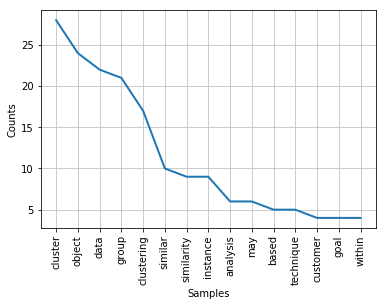

Top 15 clustering Terms:
('cluster', 28)
('object', 24)
('data', 22)
('group', 21)
('clustering', 17)
('similar', 10)
('similarity', 9)
('instance', 9)
('analysis', 6)
('may', 6)
('based', 5)
('technique', 5)
('customer', 4)
('goal', 4)
('within', 4)


In [8]:
from models import Corpora
from models import Topic_Engine

corp = Corpora(["Clustering"], ["01_data/01_Clustering_definitions"])
corp.build_all_corpora_for_new_algorithm_type("Classification", "01_data/02_Classification_definitions")

result = get_most_common_tokens("clustering", 15, corp)